

# Networks and Their Representations

Networks represent entities, which we refer to as *nodes*, and *relationships*, which we refer to as *edges*. We're being intentionally vague about what nodes and edges are because this is an extremely flexible modeling framework! Here are a few examples:


- Nodes are *people* and edges represent social relationships between them.
- Nodes are animal species and edges represent predator-prey relationships between them.
- Nodes are *locations* and edges represent transportation routes between them.
- Nodes are *Wikipedia articles* and edges represent hyperlinks between them.

Here is an example of a particularly fun network: this network describes all the social relationships between penguins and their handlers at the Kyoto Aquarium. This network is quite complex, with many different types of nodes (female penguins, male penguins, and handlers) as well as many different types of edges (mate, antagonist, parent/child, etc). We recommend clicking through the provided link and carefully studying this network.

![Image source: [Kyoto Aquarium](https://www.kyoto-aquarium.com/sokanzu/en/2024/img/kyoto_sokanzu_2024_en.jpg)](https://www.kyoto-aquarium.com/sokanzu/en/2024/img/kyoto_sokanzu_2024_en.jpg)


### Networks as Graphs

We're going to start with the simplest possible modeling framework for connected systems: graphs.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-graph}

## Graphs

A **graph** is an ordered pair $G = (V, E)$, where $V$ is the set of vertices or nodes and $E \subseteq V \times V$ a set of edges between nodes. We typically use $n = |V|$ to describe the number of vertices and $m = |E|$ to describe the number of edges.

:::
:::


Here's an example of a famous graph: the Zachary Karate Club. Each node represents a member of a university karate club, and each edge represents a friendly social relationship between them. This graph is supplied by `networkx`, the Python software package that we'll use throughout these notes for network analysis. [The code in this collapsed cell imports packages and sets up various plotting options]{.aside}

In [2]:
from matplotlib import pyplot as plt
import networkx as nx
plt.style.use('seaborn-v0_8-whitegrid')

plot_kwargs = {"node_size" : 100, "edgecolors" : 'white', "node_color" : "steelblue", "width" : 0.5, "edge_color" : "darkgrey"}

small_fig_size = (3, 2)
big_fig_size = (6, 4)

This graph has 34 nodes and 78 edges.


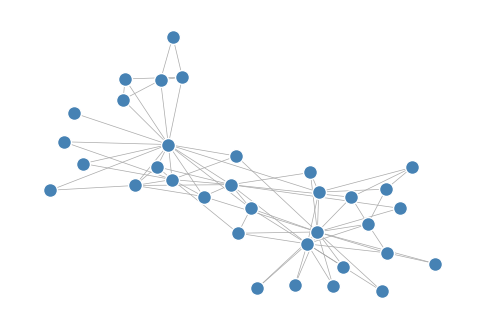

In [3]:
fig, ax = plt.subplots(1, 1, figsize = big_fig_size)

G = nx.karate_club_graph()
nx.draw(G, ax = ax, **plot_kwargs)

print('This graph has', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges.')

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'width'

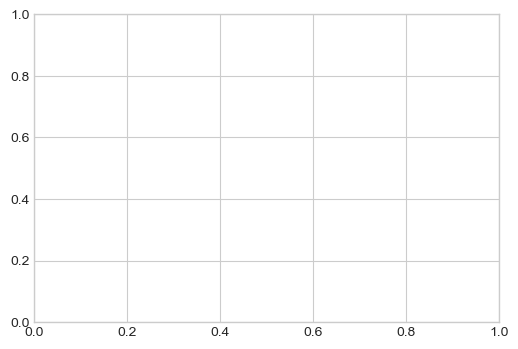

In [ ]:
# plot karate with clusters

fig, ax = plt.subplots(1, 1, figsize = big_fig_size)
pos = nx.spring_layout(G)
plt.title('Karate Club Graph')

## Introductory Graph Terminology

Now that we've introduced graphs, let's go ahead and introduce some ways to describe their structure.


### Simple graphs

Simple graphs will be our primary focus throughout much of these notes. A simple graph is a graph that has no nodes which connect directly to themselves and no repeated edges. More formally:

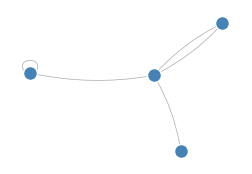

In [3]:
fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

G = nx.MultiDiGraph()
G.add_edges_from([(1, 4), (2, 4), (3, 3), (3, 4), (4, 2)])

nx.draw(G, ax = ax, connectionstyle='arc3, rad = 0.1', arrows = True, arrowsize = 0.1, **plot_kwargs)

::: {.callout-note icon=false appearance="minimal"}
::: {#def-edgetypes}

Edges that connect nodes to themselves are called **self-edges** or **self-loops**.

If there is more than one edge between the same two nodes, this is called a **multiedge.** A graph with multiedges is called a **multigraph**.

:::
:::


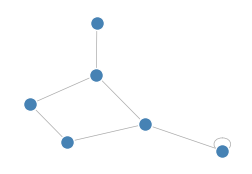

In [14]:
fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

G = nx.Graph()
edge_list = [(1, 2), (1, 2), (3, 4), (4, 5), (5, 5), (6, 1), (1, 4), (3, 6)]
G.add_edges_from(edge_list)

nx.draw(G, ax = ax, **plot_kwargs)

::: {.callout-note icon=false appearance="minimal"}
::: {#def-simplegraph}

A network that has neither self-edges nor multiedges is called a **simple graph** or **simple network**.

:::
:::




### Planar graphs

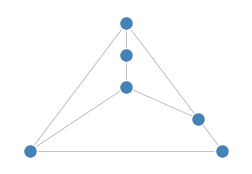

In [8]:

fig, ax = plt.subplots(1, 1, figsize = small_fig_size)
G = nx.Graph()
edgelist = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (1, 4), (3, 6)]
G.add_edges_from(edgelist)

nx.draw_planar(G, ax = ax, **plot_kwargs)

::: {.callout-note icon=false appearance="minimal"}
::: {#def-planar}

A **planar graph** is a graph that can be embedded in the plane without having any edges cross.

:::
:::

Planar graphs are commonly studied objects in graph theory and there are many cool theorems about them (see, for example, the four-color theorem or Kuratowski's theorem). This means that a network that can be represented with a planar graph can leverage this theory.




### Directed graphs

In this course, we will spend much of our time focused on the analysis of undirected graphs, where an edge between nodes $i$ and $j$ is an unordered pair $\{i,j\}$. However, there is an extension that can be important in many modeling contexts where there may be an edge from $j$ to $i$, but no edge from $i$ to $j$. This is called a **directed graph**. Informally, each edge in a directed graph has a direction, pointing from one node to another. Directed edges are usually represented by lines with arrows.


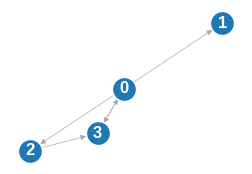

In [15]:
fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

DG = nx.DiGraph()
edgelist = [(0, 1), (0,2), (2, 3), (3, 0), (0, 3)]
DG.add_edges_from(edgelist)

nx.draw(DG,
        with_labels = True,
        arrowsize = 8,
        font_color = 'white',
        font_weight = 'bold',
        ax = ax,
        edgecolors = "white",
        width = 0.5,
        edge_color = "darkgrey")

::: {.callout-note icon=false appearance="minimal"}
::: {#def-directedgraph}

A **directed graph** (also called a **directed network** or **digraph**) is a graph in which each edge is an ordered pair $(j, i)$, which indicates an edge from node $j$ to node $i$. Such edges are called **directed edges** (or **arcs**).

:::
:::




## Matrix Representations of Graphs

One reason that graphs are particularly useful mathematical representations of networks is that they can be encoded with matrices. This is a huge advantage, because we'll be able to leverage a lot of theory we know from linear algebra.

For our definitions below, we'll suppose we have a graph $G$ with $n$ vertices.[We take the convention that the directed edge $(j, i)$ is an edge from $j$ to $i$. Notice that $(j, i)$ is represented in the $i$th row and the $j$th column of the adjacency matrix. As with so many things in math, this notation is a choice made for mathematical convenience. This choice also allows us to align with both the @newman2018networks textbook and NetworkX syntax. Be aware that different authors and sources might make a different choice!]{.aside}

### Adjacency matrix
::: {.callout-note icon=false appearance="minimal"}
::: {#def-adjacency}

The **adjacency matrix $\mathbf{A}$** of a graph $G = (V, E)$ is an $n \times n$ matrix where $n = \vert V \vert$. Its entries are
\begin{align*}
    A_{ij} = \begin{cases}
    1 & (j, i) \in E \,, \\
    0 & \text{otherwise.}
    \end{cases}
\end{align*}

For the purposes of this definition, if $G$ is undirected, then we say that, if there is an edge between $i$ and $j$, both $(i,j)$ and $(j,i)$ are in $E$.

:::
:::

Let's observe a few notes about how the graph structure relates to the structure of the adjacency matrix.

- If there are no self-edges, the diagonal elements $A_{ii}$ are all zero.
- If the network is undirected, then an edge between $i$ and $j$ implies the existence of an edge between $j$ and $i$. This means that $A_{ji} = A_{ij}$ and thus the adjacency matrix is symmetric.
- Similarly, if the adjacency matrix is not symmetric, the network cannot be undirected.


> **Example.** The adjacency matrix for the graph in @fig-directed is
$$
\begin{pmatrix}
    0 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0
\end{pmatrix}
$$

If we have a graph with self-edges, then $\{i,i\} \in E$ for some $i.$ If the graph is undirected, we represent this in the adjacency matrix by setting $A_{ii} = 2.$ If the graph is directed, we set $A_{ii} = 1.$[This is another convention that will make the mathematics easier. An intuitive way to understand this choice is that, in undirected graphs, every edge "shows up" twice in the adjacency matrix, whereas in directed graphs every edge "shows up" once.]{.aside}

If we have a graph with multiedges, then we can set the corresponding matrix element $A_{ij}$ equal to the multiplicity of the edge. For example, a double edge between nodes 2 and 3 in an undirected graph is represented $A_{23} = A_{32} = 2.$

But why stop there? Instead of requiring an integer number of edges between two nodes, we could extend this idea to form **weighted networks** with real-valued edge weights. Sometimes it is useful to represent edges as having a strength, weight, or value. In this situation, we set the value of $A_{ij}$ equal to the weight of the corresponding edge $(j, i)$. For example, weights in an airport network could be used represent a distance between two airports, or weights in a social media network could represent the number of messages sent between two individuals.


### Many more matrices ...

There are LOTS of matrices that can be associated to networks. There’s no "right” one --- some are more useful than others for certain jobs. Throughout this course, we’ll see examples of matrices that are well-suited to certain specific tasks, like ranking or clustering. If you’re interested in searching around a bit, some other fun matrices are:

- The graph Laplacian matrix and its variants.
- The nonbacktracking or Hashimoto matrix.
- The modularity matrix.
- The random-walk transition matrix.
- The PageRank matrix.
- The node-edge incidence matrix.

And the list goes on!

## Graphs in NetworkX

If you've been following along with the computational examples above, you've already seen a few examples of manipulating graphs in Python using the [NetworkX](https://networkx.org/) package. In this section, we'll highlight a few especially important NetworkX operations.

### Creating networks

#### Growing a Network By Hand

One way to create a network in NetworkX is to construct it by hand. To start, we need to initialize an empty network.

We can create an empty undirected graph $G$ using `G = nx.Graph()`. You could instead create an empty directed graph using `nx.DiGraph()` or an empty multigraph using `nx.MultiGraph()`.

#### Adding nodes or edges manually
You can add one node at a time. For example,

> `G.add_node(1)`

will add a node with the label 1. We use an integer here, but a node can be any hashable Python object.
You can add one edge at a time using tuples of nodes

> `G.add_edge(1, 2)`

If you create an edge connecting to a node that's not in your graph yet, the node gets created automatically.

In most cases it's pretty inefficient to add one node or edge at a time. Fortunately, you can also add nodes and edges from a list or any other iterable container:

> `G.add_nodes_from(nodelist)`

> `G.add_edges_from(edgelist)`

There are corresponding methods to remove nodes and edges: `G.remove_node()`, `G.remove_edge()`, `G.remove_nodes_from()`, `G.remove_edges_from()`.

We've seen examples of this approach in the constructions of @fig-self-edge, @fig-simple-graph, and @fig-directed above.

#### Creating a graph dictionary

You can also build your graph using a dictionary that maps nodes to neighbors. The code below creates a graph with 3 nodes, where nodes 1 and 3 are both connected to node 2, but not to each other.

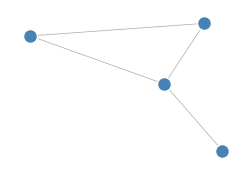

In [18]:
fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

graph_dict = {1: [2], 2: [1, 3], 3: [2], 4 : [2, 3]}
G = nx.Graph(graph_dict)

nx.draw(G, ax = ax, **plot_kwargs)

It's also possible to "go backwards" and obtain the dictionary representation from the graph object using

In [17]:
nx.to_dict_of_lists(G)

{1: [2], 2: [1, 3, 4], 3: [2, 4], 4: [2, 3]}

#### Using an adjacency matrix

In amny cases, we might actually have a complete network represented as an adjacency matrix. We'll typically use the Numpy package for representing arrays of numbers like matrices.

You can directly create a graph using a numpy array that encodes your adjacency matrix representation for your graph. The example network in @fig-graph-dict-example has the adjacency matrix

$$
\begin{pmatrix}
    0 & 1 & 0 & 0 \\
    1 & 0 & 1 & 1 \\
    0 & 1 & 0 & 1 \\
    0 & 1 & 1 & 0
\end{pmatrix}
$$

We can construct this matrix in Python using the `numpy` package, and then create a graph with it:

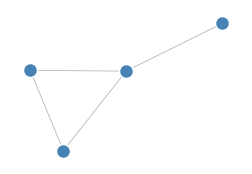

In [20]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

A = np.array([[0, 1, 0, 0],
              [1, 0, 1, 1],
              [0, 1, 0, 1],
              [0, 1, 1, 0]])
G = nx.from_numpy_array(A)

nx.draw(G, ax = ax, **plot_kwargs)

For a directed graph, you need to make two additional changes to the code above. You need specify that you want a directed graph with the `create_using` argument to the graph constructor. Additionally, you need to be very careful about the adjacency matrix convention for in and out edges. The default convention for `from_numpy_array` points edges in the *opposite* direction to what we defined above (it assumes $A_{ij} = 1$ if $(i,j) \in E$), so if you want to match that convention, you'll need to take the transpose with `np.transpose`.

Here's an example of constructing the directed graph shown in @fig-directed from an adjacency matrix.

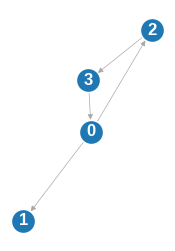

In [23]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize = (2, 3))

A = np.array([[0, 0, 0, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [0, 0, 1, 0]])

# need to transpose matrix as order of Aij vs Aji for networkx does not agree with us
G = nx.from_numpy_array(np.transpose(A), create_using = nx.DiGraph)
nx.draw(G,
        with_labels = True,
        arrowsize = 8,
        font_color = 'white',
        font_weight = 'bold',
        ax = ax,
        edgecolors = "white",
        width = 0.5,
        edge_color = "darkgrey")

### Visualizing Networks

Throughout these notes, we've used the `nx.draw` function to visualize networks. This function is built on the widely-used `matplotlib` plotting library. There are [many arguments and options](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) you can pass to `nx.draw` to customize the appearance of your network.

::: {.callout-note icon=false appearance="minimal"}

## Exercises!

- Using NetworkX to reproduce  @fig-self-edge and @fig-simple-graph from (a) a dictionary representation and (b) an adjacency matrix.
- Draw the network represented by the adjacency matrix.
$$
\begin{pmatrix}
    0 & 1 & 0 & 0 & 1 \\
    1 & 0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 1 & 0 \\
    1 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0
\end{pmatrix} \,.
$$
- Construct your own network! Try changing a few drawing arguments to experiment with graph aesthetics.

:::

::: {.hide}


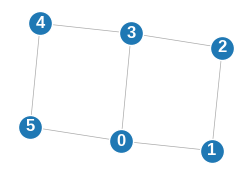

In [60]:
# Use NetworkX to reproduce the figures from the notes.
# Then, create and visualize the network represented by the given adjacency matrix.
# Finally, create your own network.

fig, ax = plt.subplots(1, 1, figsize = small_fig_size)

A = np.array([[0, 1, 0, 1, 0, 1],
              [1, 0, 1, 0, 0, 0],
              [0, 1, 0, 1, 0, 0],
              [1, 0, 1, 0, 1, 0],
              [0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0]])
G = nx.from_numpy_array(A)

nx.draw(G,
        with_labels = True,
        arrowsize = 8,
        font_color = 'white',
        font_weight = 'bold',
        ax = ax,
        edgecolors = "white",
        width = 0.5,
        edge_color = "darkgrey")

This graph has 34 nodes and 78 edges.


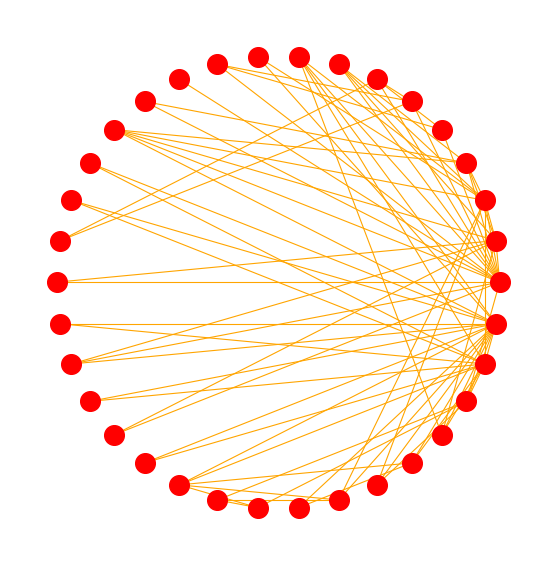

In [88]:
# beautiful karate graph
fig_size = (6, 6)
fig, ax = plt.subplots(1, 1, figsize = fig_size)
fig.tight_layout()

G = nx.karate_club_graph()
layout = nx.circular_layout(G)
plot_kwargs = {"node_size" : 200, "edgecolors" : 'red', "node_color" : "red", "width" : 0.8, "edge_color" : "orange"}

nx.draw(G, ax = ax,
        pos = layout,
        **plot_kwargs)

print('This graph has', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges.')

:::






## References